
# 1.	The descriptive statistics of the "MovieReviewTrainingDatabase.csv" dataset are as follows:
* •	There are a total of 25,000 entries in the dataset.
* •	The dataset has two unique categories in the sentiment column: "Positive" and "Negative".
* •	The number of positive and negative reviews is equal, with each category having 12,500 entries.
* •	The review column contains 24,904 unique movie reviews.
* •	The most frequent review appears 3 times in the dataset, indicating a very low level of repetition among the reviews.


In [2]:
pip install pandas

# Upload Dataset

In [3]:
import pandas as pd

df = pd.read_excel('/content/Movie-Review-Training-Database(Güncel).xls')


print(df)



                                        sentiment,review  \
0      Positive,"With all this stuff going down at th...   
1      Positive,"'The Classic War of the Worlds' by T...   
2      Negative,"The film starts with a manager (Nich...   
3      Negative,"It must be assumed that those who pr...   
4      Positive,"Superbly trashy and wondrously unpre...   
...                                                  ...   
24995  Negative,"It seems like more consideration has...   
24996  Negative,"I don't believe they made this film....   
24997  Negative,"Guy is a loser. Can't get girls, nee...   
24998  Negative,"This 30 minute documentary Bu√±uel m...   
24999  Positive,"I saw this movie as a child and it b...   

                                              Unnamed: 1 Unnamed: 2  \
0                                                    NaN        NaN   
1                                                    NaN        NaN   
2                                                    NaN        Na

# 2 - Column name checking / Column name correction / Finding missing values / Separating columns



* The problem with our dataset was that all the
data was in a single column. First of all, we
learned the names of the columns with print(df.
columns) code, then we renamed these columns using df.rename code. Then we separated these columns into 2 separate columns as sentiment and review. After doing these, we checked whether there was a missing value using .isna().sum() code. **bold text**

In [4]:
print(df.columns)

Index(['sentiment,review', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18'],
      dtype='object')


In [5]:
split_data = df['sentiment,review'].str.split(',', n=1, expand=True)


In [6]:
split_data.columns = ['Sentiment', 'Review']

In [7]:
print(split_data.head())

  Sentiment                                             Review
0  Positive  "With all this stuff going down at the moment ...
1  Positive  "'The Classic War of the Worlds' by Timothy Hi...
2  Negative  "The film starts with a manager (Nicholas Bell...
3  Negative  "It must be assumed that those who praised thi...
4  Positive  "Superbly trashy and wondrously unpretentious ...


In [8]:
null_values = split_data.isna().sum()
print(null_values)

Sentiment    0
Review       0
dtype: int64


3. NORMALIZE DATA

In [9]:
import pandas as pd

# 'sentiment' sütunundaki değerleri değiştirin
split_data['Sentiment'] = split_data['Sentiment'].map({'Positive': 1, 'Negative': 0})

# Sonuçları kontrol edin
print(split_data.head())


   Sentiment                                             Review
0          1  "With all this stuff going down at the moment ...
1          1  "'The Classic War of the Worlds' by Timothy Hi...
2          0  "The film starts with a manager (Nicholas Bell...
3          0  "It must be assumed that those who praised thi...
4          1  "Superbly trashy and wondrously unpretentious ...


In [10]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Select columns to normalize
columns_to_normalize = ['Sentiment']  # Replace with your actual column names

# Apply Min-Max normalization
scaler = MinMaxScaler()
split_data[columns_to_normalize] = scaler.fit_transform(split_data[columns_to_normalize])

# Display the normalized data
print(split_data.head())


   Sentiment                                             Review
0        1.0  "With all this stuff going down at the moment ...
1        1.0  "'The Classic War of the Worlds' by Timothy Hi...
2        0.0  "The film starts with a manager (Nicholas Bell...
3        0.0  "It must be assumed that those who praised thi...
4        1.0  "Superbly trashy and wondrously unpretentious ...


4. Üste yaptıklarını açıkla burada!


5.

Logistic Regression Method

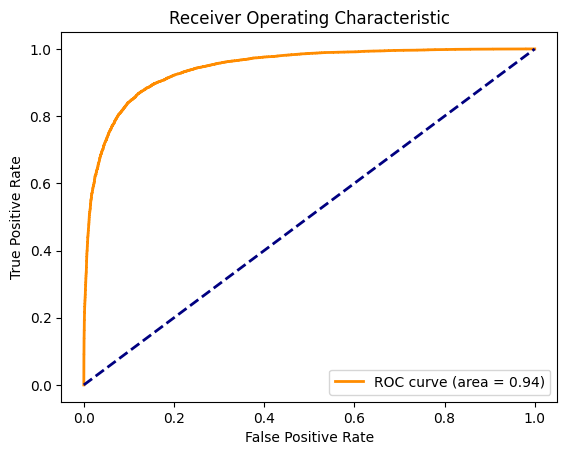

On Kat Çapraz Doğrulama Sonuçları:
Ortalama Doğruluk: 0.8716800000000001
Karışıklık Matrisi:
[[8078 1330]
 [1076 8266]]
Doğruluk: 0.87168
F1 Skoru: 0.872953849403316


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt


split_dataNew = split_data.dropna(subset=['Sentiment'])  # NaN değerlerini kaldırın
X = split_dataNew['Review']  # Metin sütunu
y = split_dataNew['Sentiment']

# Metin vektörleştirme
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Veri setini ayırma
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.25, random_state=42)

# Model ve çapraz doğrulama
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
log_reg = LogisticRegression()
cv_results = cross_val_score(log_reg, X_train, y_train, cv=kfold, scoring='accuracy')

# Modeli eğit ve tahmin yap
log_reg.fit(X_train, y_train)
y_pred = cross_val_predict(log_reg, X_train, y_train, cv=kfold)

# Değerlendirmeler
conf_matrix = confusion_matrix(y_train, y_pred)
accuracy = accuracy_score(y_train, y_pred)
f1score = f1_score(y_train, y_pred)

# ROC Eğrisi
y_pred_proba = cross_val_predict(log_reg, X_train, y_train, cv=kfold, method='predict_proba')[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_pred_proba)
roc_auc = auc(fpr, tpr)

# ROC Eğrisini Çizdir
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Sonuçları yazdır
print("On Kat Çapraz Doğrulama Sonuçları:")
print(f"Ortalama Doğruluk: {cv_results.mean()}")
print(f"Karışıklık Matrisi:\n{conf_matrix}")
print(f"Doğruluk: {accuracy}")
print(f"F1 Skoru: {f1score}")


Confusion Matrix:
 [[2690  402]
 [ 353 2805]]
Accuracy: 0.8792
F1 Score: 0.8813825608798114


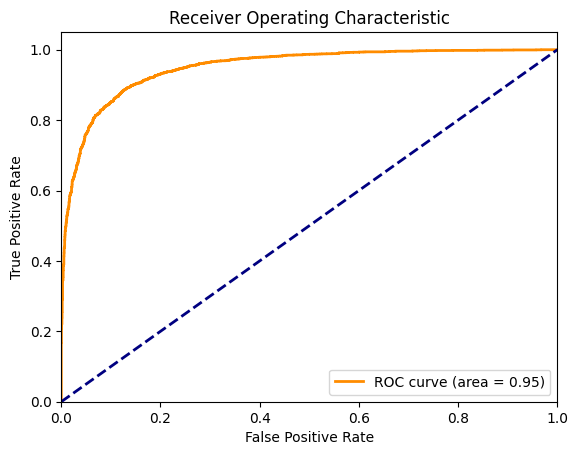

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it has two columns: 'text' and 'sentiment'
# where 'text' contains the review and 'sentiment' is 0 or 1 (negative or positive)

# Text vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(split_dataNew['Review'])
y = split_dataNew['Sentiment']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Training the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# F1 Score
f1 = f1_score(y_test, y_pred)
print('F1 Score:', f1)

# ROC Curve
y_pred_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Discuss results (Compare)

Support Vector Machines(SVM)

In [13]:
split_dataNew = split_data.dropna(subset=['Sentiment'])

Naive Bayes Classifier Method

Confusion Matrix:
 [[8340 1068]
 [1721 7621]]
Accuracy: 0.8512533333333333
F1 Score: 0.8453219455382397


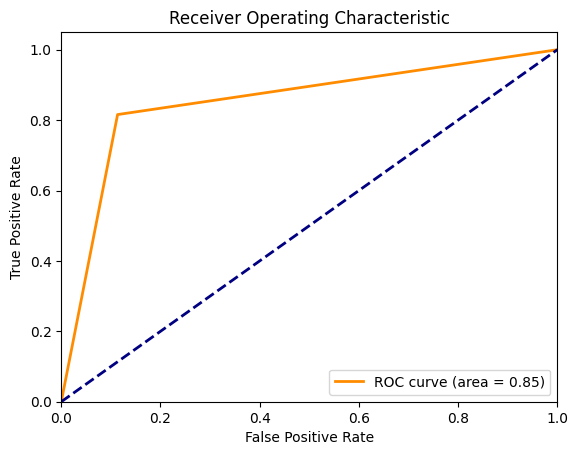

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_predict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt


# Text vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(split_dataNew['Review'])
y = split_dataNew['Sentiment']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Naive Bayes classifier
nb_classifier = MultinomialNB()

# StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform ten-fold cross-validation
y_pred = cross_val_predict(nb_classifier, X_train, y_train, cv=cv)

# Evaluation metrics
conf_matrix = confusion_matrix(y_train, y_pred)
accuracy = accuracy_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)
fpr, tpr, thresholds = roc_curve(y_train, y_pred)
roc_auc = auc(fpr, tpr)

# Display results
print('Confusion Matrix:\n', conf_matrix)
print('Accuracy:', accuracy)
print('F1 Score:', f1)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Test Data - Confusion Matrix:
 [[2703  389]
 [ 543 2615]]
Test Data - Accuracy: 0.85088
Test Data - F1 Score: 0.8487504057124311


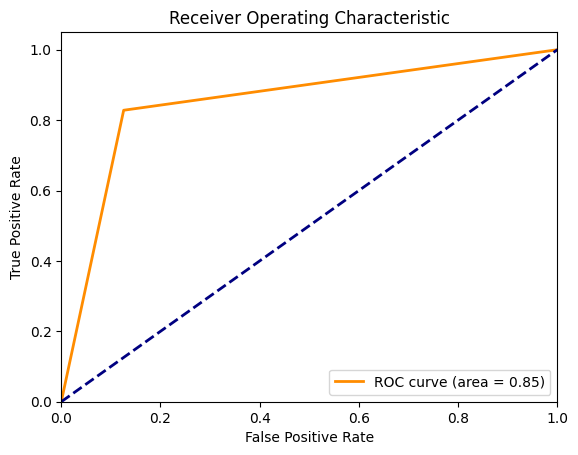

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with 'Review' and 'Sentiment' columns

# Text vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(split_dataNew['Review'])
y = split_dataNew['Sentiment']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Naive Bayes classifier
nb_classifier = MultinomialNB()  # Varsayılan parametrelerle veya belirli bir alpha değeriyle kullanabilirsiniz

# Train the model
nb_classifier.fit(X_train, y_train)

# Test the model
y_pred = nb_classifier.predict(X_test)

# Evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Display results for test data
print('Test Data - Confusion Matrix:\n', conf_matrix)
print('Test Data - Accuracy:', accuracy)
print('Test Data - F1 Score:', f1)

# Plot ROC Curve for test data
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Neural Network Method

In [23]:
!pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56439 sha256=bca52180033164c1a89265c38daacfc7845e34b1c9be4b56fc2020c8e092f931
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score
from keras.models import Sequential
from keras.layers import Dense



# Text vectorization
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust the number of features
X = vectorizer.fit_transform(split_dataNew['Review']).toarray()
y = split_dataNew['Sentiment']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# StratifiedKFold for cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store metrics
acc_scores = []
f1_scores = []
roc_auc_scores = []
conf_matrices = []

for train, val in kfold.split(X_train, y_train):
    # Build the neural network model
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    model.fit(X_train[train], y_train.iloc[train], epochs=10, batch_size=10, verbose=0)

    # Evaluate the model
    y_pred = model.predict(X_train[val])
    y_pred_class = (y_pred > 0.5).astype('int32').flatten()

    # Calculate metrics
    acc_scores.append(accuracy_score(y_train.iloc[val], y_pred_class))
    f1_scores.append(f1_score(y_train.iloc[val], y_pred_class))
    roc_auc_scores.append(roc_auc_score(y_train.iloc[val], y_pred))
    conf_matrices.append(confusion_matrix(y_train.iloc[val], y_pred_class))

# Average results from all folds
print('Average Accuracy:', np.mean(acc_scores))
print('Average F1 Score:', np.mean(f1_scores))
print('Average ROC AUC Score:', np.mean(roc_auc_scores))
# Combine confusion matrices
print('Combined Confusion Matrix:\n', np.sum(conf_matrices, axis=0))


59/59 [==============================] - 0s 1ms/step
Average Accuracy: 0.8361599999999999
Average F1 Score: 0.8355458240609531
Average ROC AUC Score: 0.9170334529227674
Combined Confusion Matrix:
 [[7867 1541]
 [1531 7811]]


Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4052 - accuracy: 0.8229
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3354 - accuracy: 0.8517
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3248 - accuracy: 0.8560
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3151 - accuracy: 0.8591
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3024 - accuracy: 0.8661
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2888 - accuracy: 0.8721
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2720 - accuracy: 0.8831
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2515 - accuracy: 0.8973
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2301 - accuracy: 0.9114
Epoch 10/10
196/196 [==============================] - 0s 2ms/step
Confusion Matri

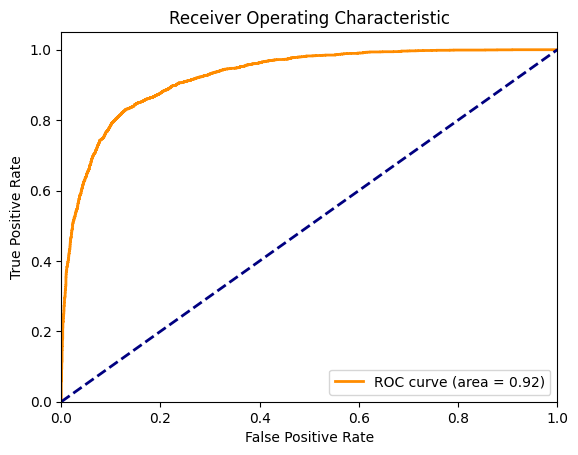

In [27]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt


# Text vectorization
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust the number of features
X = vectorizer.fit_transform(split_dataNew['Review']).toarray()
y = split_dataNew['Sentiment']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Build the neural network model (use your optimized parameters)
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=10, verbose=1)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_class = (y_pred > 0.5).astype('int32').flatten()

# Evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred_class)
accuracy = accuracy_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Display results
print('Confusion Matrix:\n', conf_matrix)
print('Accuracy:', accuracy)
print('F1 Score:', f1)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


6.

In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from scipy import stats

# Assuming 'df' is your DataFrame with 'Review' and 'Sentiment' columns

# Text vectorization
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust the number of features
X = vectorizer.fit_transform(split_dataNew['Review']).toarray()
y = split_dataNew['Sentiment']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define and train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Define and train Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Define and train Neural Network model
nn_model = Sequential()
nn_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))  # Binary classification
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn_model.fit(X_train, y_train, epochs=10, batch_size=10, verbose=1)

# Make predictions with each model
nb_predictions = nb_predictions.astype(int)
lr_predictions = lr_predictions.astype(int)
nn_predictions = nn_predictions.astype(int)

# Ensemble Predictions with Majority Voting
ensemble_predictions = np.array([nb_predictions, lr_predictions, nn_predictions])
majority_vote_predictions = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=ensemble_predictions)

# Calculate Accuracy
ensemble_accuracy = accuracy_score(y_test, majority_vote_predictions)
print("Ensemble Model Accuracy:", ensemble_accuracy)


Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4043 - accuracy: 0.8220
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3374 - accuracy: 0.8525
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3269 - accuracy: 0.8565
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3174 - accuracy: 0.8583
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3070 - accuracy: 0.8628
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2947 - accuracy: 0.8710
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2790 - accuracy: 0.8785
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2620 - accuracy: 0.8906
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2402 - accuracy: 0.9043
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.216

7. * For Logistic Regression and Naive Bayes: Chi-Squared Test
The Chi-Squared statistical test is used for categorical features in classification tasks. It measures the dependence between stochastic variables, so using this test for feature selection involves choosing the features that are most likely to be independent of the class and therefore irrelevant for classification.
In Python, you can use SelectKBest with the chi2 score function from the sklearn.feature_selection module.
* For Neural Networks: Feature Importance from a Simpler Model
Neural networks are complex and don't provide straightforward ways to interpret feature importance. A common practice is to use a simpler model, like a Random Forest, to estimate feature importance and then use those features in the neural network.
In Python, train a Random Forest using RandomForestClassifier from sklearn.ensemble, then use the feature_importances_ attribute to find the most important features.

In [36]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define logistic regression model
lr = LogisticRegression()

# RFE model
rfe = RFE(estimator=lr, n_features_to_select=500)  # Adjust the number of features
X_rfe = rfe.fit_transform(X, y)

# Now, use X_rfe for training and testing the logistic regression model

# Splitting the data into training and testing sets
X_train_rfe, X_test_rfe, y_train_rfe, y_test_rfe = train_test_split(X_rfe, y, test_size=0.25, random_state=42)

# Train the logistic regression model
lr.fit(X_train_rfe, y_train_rfe)

# Making predictions
y_pred_rfe = lr.predict(X_test_rfe)

# Evaluating the model
accuracy = accuracy_score(y_test_rfe, y_pred_rfe)
conf_matrix = confusion_matrix(y_test_rfe, y_pred_rfe)
class_report = classification_report(y_test_rfe, y_pred_rfe)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)



KeyboardInterrupt: 

In [33]:
from sklearn.feature_selection import SelectKBest, chi2

# Assuming X_train and X_test are your feature datasets
# Chi-Squared Test for Logistic Regression and Naive Bayes
# Select top k features based on chi-squared test
k = 100  # number of features to select
chi2_selector = SelectKBest(chi2, k=k)
X_train_kbest = chi2_selector.fit_transform(X_train, y_train)
X_test_kbest = chi2_selector.transform(X_test)

# Now train Logistic Regression or Naive Bayes using X_train_kbest and X_test_kbest


In [34]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest to determine feature importance
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
importances = rf.feature_importances_

# Select top k features
indices = np.argsort(importances)[::-1][:k]
X_train_topk = X_train[:, indices]
X_test_topk = X_test[:, indices]

# Now train a Neural Network using X_train_topk and X_test_topk
